# В исследовании решается задача классификация сотрудников по признаку target - ищет (1) или не ищет (0) работу

# Источник данных - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os

In [2]:
plt.rcParams["figure.figsize"] = (10,8)

# План

1. Импорт данных, разведочный анализ 
2. Подготовка и очистка данных
3. Обучение модели
5. Выводы

# Импорт данных, разведочный анализ данных

In [3]:
train = pd.read_csv('aug_train.csv')

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train.shape

(19158, 14)

In [6]:
train = train.drop('enrollee_id', axis = 1)

In [7]:
train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


## Статистика по числовым данным

In [9]:
train.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


## City

In [10]:
print(train['city'].isna().sum(), 'не имеют значения')

0 не имеют значения


In [11]:
print("Всего", len(train['city'].unique()), 'уникальных города')

Всего 123 уникальных города


## Gender

In [12]:
print(train['gender'].isna().sum(), 'не имеют значения')

4508 не имеют значения


{'Male': 13221, 'Female': 1238, 'Other': 191}


<BarContainer object of 3 artists>

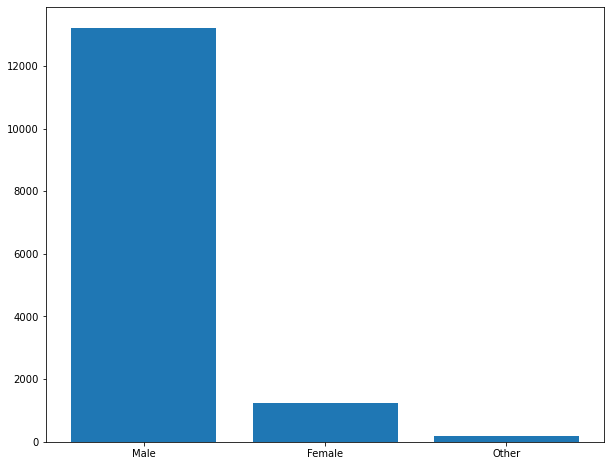

In [13]:
gender_data = {}
for gender in train[train['gender'].notna()]['gender'].unique():
    gender_data[gender] = train[train['gender'] == gender].shape[0]
print(gender_data)
plt.bar(gender_data.keys(), gender_data.values())

## Relevent_experience

In [14]:
print(train['relevent_experience'].isna().sum(), 'не имеют значения')

0 не имеют значения


{'Has relevent experience': 13792, 'No relevent experience': 5366}


<BarContainer object of 2 artists>

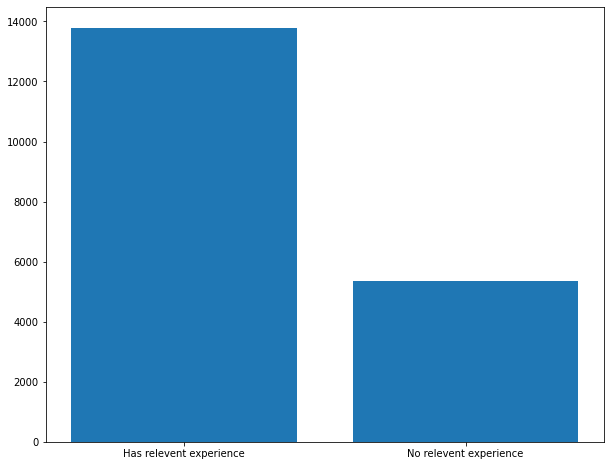

In [15]:
relevent_experience_data = {}
for relevent_experience in train[train['relevent_experience'].notna()]['relevent_experience'].unique():
    relevent_experience_data[relevent_experience] = train[train['relevent_experience'] == relevent_experience].shape[0]
print(relevent_experience_data)
plt.bar(relevent_experience_data.keys(), relevent_experience_data.values())

## Enrolled_university

In [16]:
print(train['enrolled_university'].isna().sum(), 'не имеют значения')

386 не имеют значения


{'no_enrollment': 13817, 'Full time course': 3757, 'Part time course': 1198}


<BarContainer object of 3 artists>

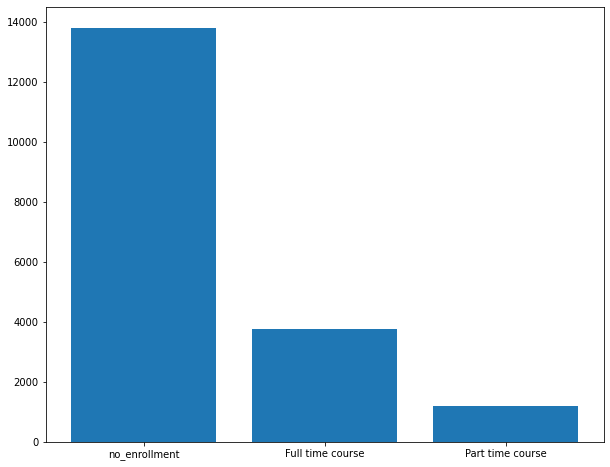

In [17]:
enrolled_university_data = {}
for enrolled_university in train[train['enrolled_university'].notna()]['enrolled_university'].unique():
    enrolled_university_data[enrolled_university] = train[train['enrolled_university'] == enrolled_university].shape[0]
print(enrolled_university_data)
plt.bar(enrolled_university_data.keys(), enrolled_university_data.values())

## Education_level

In [18]:
print(train['education_level'].isna().sum(), 'не имеют значения')

460 не имеют значения


{'Graduate': 11598, 'Masters': 4361, 'High School': 2017, 'Phd': 414, 'Primary School': 308}


<BarContainer object of 5 artists>

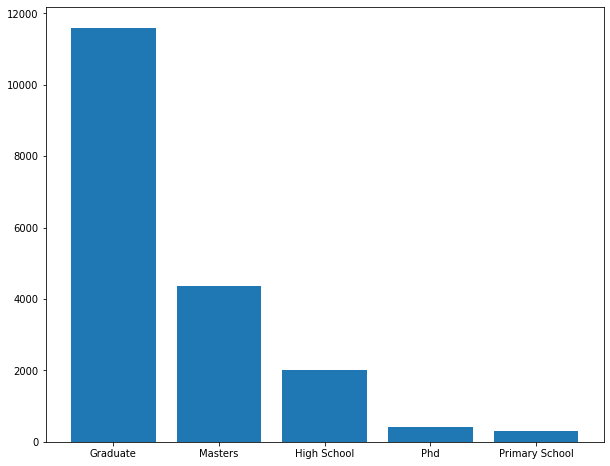

In [19]:
education_level_data = {}
for education_level in train[train['education_level'].notna()]['education_level'].unique():
    education_level_data[education_level] = train[train['education_level'] == education_level].shape[0]
print(education_level_data)
plt.bar(education_level_data.keys(), education_level_data.values())

## Major_discipline

In [20]:
print(train['major_discipline'].isna().sum(), 'не имеют значения')

2813 не имеют значения


{'STEM': 14492, 'Business Degree': 327, 'Arts': 253, 'Humanities': 669, 'No Major': 223, 'Other': 381}


<BarContainer object of 6 artists>

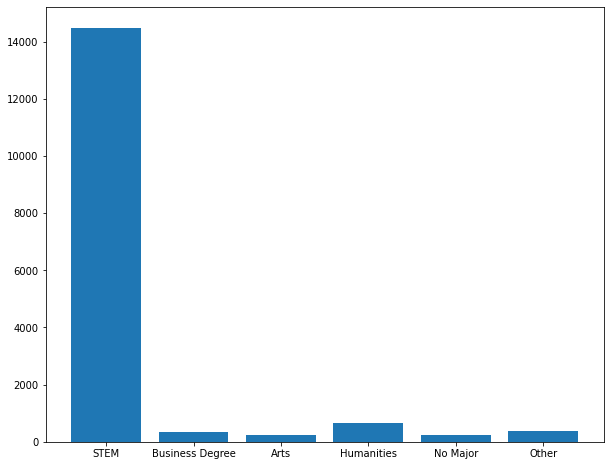

In [21]:
major_discipline_data = {}
for major_discipline in train[train['major_discipline'].notna()]['major_discipline'].unique():
    major_discipline_data[major_discipline] = train[train['major_discipline'] == major_discipline].shape[0]
print(major_discipline_data)
plt.bar(major_discipline_data.keys(), major_discipline_data.values())

## Experience

In [22]:
print(train['experience'].isna().sum(), 'не имеют значения')

65 не имеют значения


{'>20': 3286, '15': 686, '5': 1430, '<1': 522, '11': 664, '13': 399, '7': 1028, '17': 342, '2': 1127, '16': 508, '1': 549, '4': 1403, '10': 985, '14': 586, '18': 280, '19': 304, '12': 494, '3': 1354, '6': 1216, '9': 980, '8': 802, '20': 148}


<BarContainer object of 22 artists>

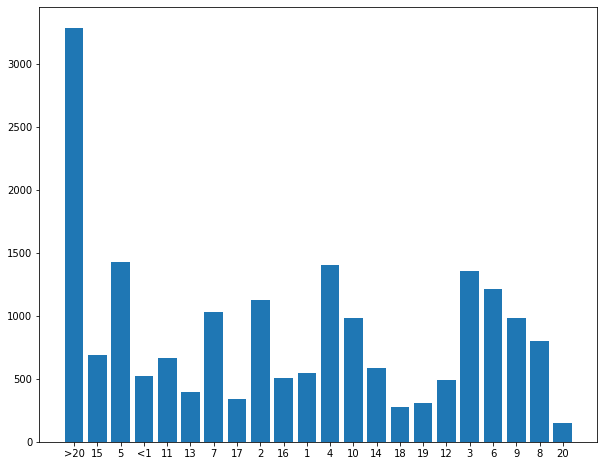

In [23]:
experience_data = {}
for experience in train[train['experience'].notna()]['experience'].unique():
    experience_data[experience] = train[train['experience'] == experience].shape[0]
print(experience_data)
plt.bar(experience_data.keys(), experience_data.values())

## Company_size

In [24]:
print(train['company_size'].isna().sum(), 'не имеют значения')

5938 не имеют значения


{'50-99': 3083, '<10': 1308, '10000+': 2019, '5000-9999': 563, '1000-4999': 1328, '10/49': 1471, '100-500': 2571, '500-999': 877}


<BarContainer object of 8 artists>

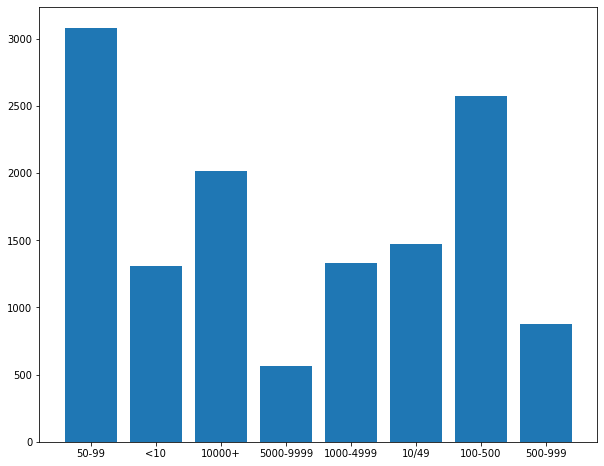

In [25]:
company_size_data = {}
for company_size in train[train['company_size'].notna()]['company_size'].unique():
    company_size_data[company_size] = train[train['company_size'] == company_size].shape[0]
print(company_size_data)
plt.bar(company_size_data.keys(), company_size_data.values())

# Company_type

In [26]:
print(train['company_type'].isna().sum(), 'не имеют значения')

6140 не имеют значения


{'Pvt Ltd': 9817, 'Funded Startup': 1001, 'Early Stage Startup': 603, 'Other': 121, 'Public Sector': 955, 'NGO': 521}


<BarContainer object of 6 artists>

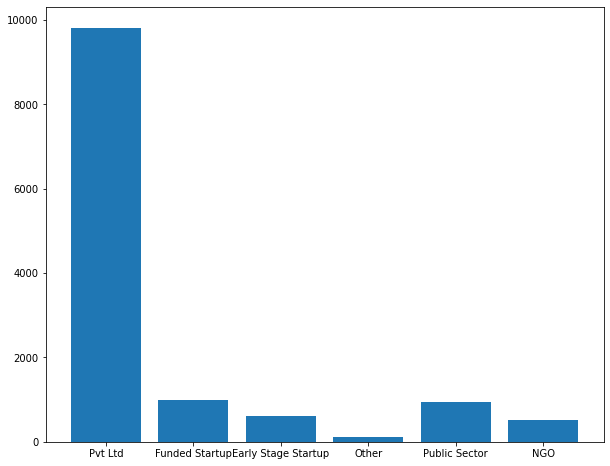

In [27]:
company_type_data = {}
for company_type in train[train['company_type'].notna()]['company_type'].unique():
    company_type_data[company_type] = train[train['company_type'] == company_type].shape[0]
print(company_type_data)
plt.bar(company_type_data.keys(), company_type_data.values())

# Last_new_job

In [28]:
print(train['last_new_job'].isna().sum(), 'не имеют значения')

423 не имеют значения


{'1': 8040, '>4': 3290, 'never': 2452, '4': 1029, '3': 1024, '2': 2900}


<BarContainer object of 6 artists>

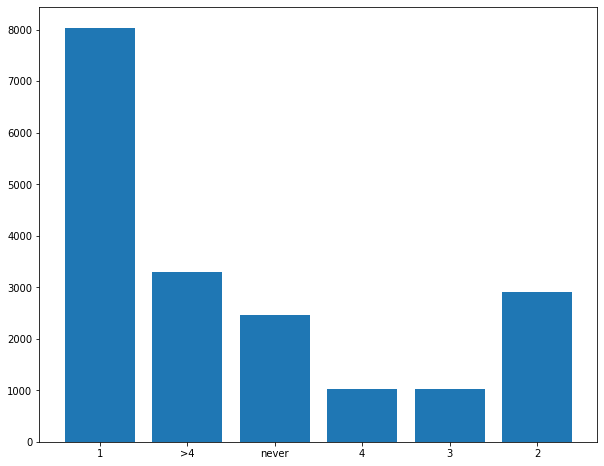

In [29]:
last_new_job_data = {}
for last_new_job in train[train['last_new_job'].notna()]['last_new_job'].unique():
    last_new_job_data[last_new_job] = train[train['last_new_job'] == last_new_job].shape[0]
print(last_new_job_data)
plt.bar(last_new_job_data.keys(), last_new_job_data.values())

# Target

In [30]:
print(train['target'].isna().sum(), 'не имеют значения')

0 не имеют значения


{1.0: 4777, 0.0: 14381}


<BarContainer object of 2 artists>

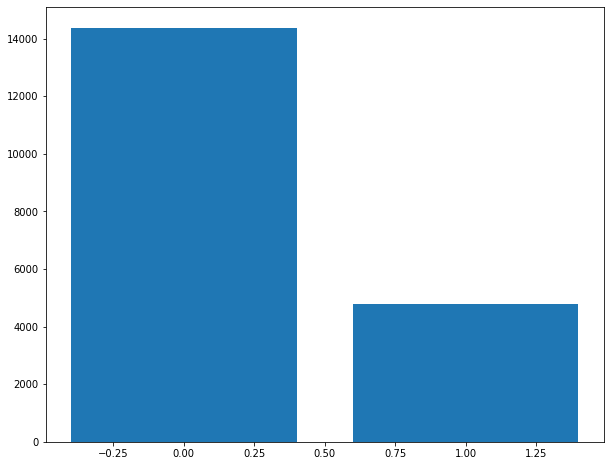

In [31]:
target_data = {}
for target in train[train['target'].notna()]['target'].unique():
    target_data[target] = train[train['target'] == target].shape[0]
print(target_data)
plt.bar(target_data.keys(), target_data.values())

In [ ]:
# Здесь видим, что набор данных несбалансированный.
# Примеров тех, кто не ищет работу,  в 3 раза больше, чем примеров тех, кто не ищет

# Очистка данных. Замена пустых значений

In [32]:
print(train['gender'].isna().sum(), 'не имеют значения')
train['gender'] = train['gender'].fillna('Unknown_gender') 
print(train['gender'].isna().sum(), 'не имеют значения')

4508 не имеют значения
0 не имеют значения


In [33]:
print(train['enrolled_university'].isna().sum(), 'не имеют значения')
train['enrolled_university'] = train['enrolled_university'].fillna('Unknown_enrolled_university') 
print(train['enrolled_university'].isna().sum(), 'не имеют значения')

386 не имеют значения
0 не имеют значения


In [34]:
print(train['education_level'].isna().sum(), 'не имеют значения')
train['education_level'] = train['education_level'].fillna('Unknown_education_level') 
print(train['education_level'].isna().sum(), 'не имеют значения')

460 не имеют значения
0 не имеют значения


In [35]:
print(train['major_discipline'].isna().sum(), 'не имеют значения')
train['major_discipline'] = train['major_discipline'].fillna('Unknown_major_discipline') 
print(train['major_discipline'].isna().sum(), 'не имеют значения')

2813 не имеют значения
0 не имеют значения


In [36]:
print(train['experience'].isna().sum(), 'не имеют значения')
train['experience'] = train['experience'].fillna('Unknown_experience') 
print(train['experience'].isna().sum(), 'не имеют значения')

65 не имеют значения
0 не имеют значения


In [37]:
print(train['company_size'].isna().sum(), 'не имеют значения')
train['company_size'] = train['company_size'].fillna('Unknown_company_size') 
print(train['company_size'].isna().sum(), 'не имеют значения')

5938 не имеют значения
0 не имеют значения


In [38]:
print(train['company_type'].isna().sum(), 'не имеют значения')
train['company_type'] = train['company_type'].fillna('Unknown_company_type') 
print(train['company_type'].isna().sum(), 'не имеют значения')

6140 не имеют значения
0 не имеют значения


In [39]:
print(train['last_new_job'].isna().sum(), 'не имеют значения')
train['last_new_job'] = train['last_new_job'].fillna('Unknown_last_new_job') 
print(train['last_new_job'].isna().sum(), 'не имеют значения')

423 не имеют значения
0 не имеют значения


In [40]:
train.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [41]:
# Заменяем текстовые значения цифрами 
for col in train.columns:
    if train[col].dtype == "object":
        train[col] = LabelEncoder().fit_transform(train[col])

In [42]:
#Считаем корреляции 
train.corr()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city,1.000000,-0.326104,0.049546,0.006154,-0.079245,0.006448,0.105038,-0.042545,0.026963,0.019465,0.001763,0.009537,0.056233
city_development_index,-0.326104,1.000000,-0.154868,-0.059808,0.171612,0.039749,-0.101260,0.035141,-0.056537,-0.030946,-0.024093,0.001920,-0.341665
gender,0.049546,-0.154868,1.000000,0.099137,-0.104901,0.059195,0.065875,0.001815,0.061470,0.044373,0.067027,0.001057,0.067676
relevent_experience,0.006154,-0.059808,0.099137,1.000000,-0.375810,0.111214,0.095723,-0.008235,0.343754,0.188282,0.228555,-0.011566,0.128430
enrolled_university,-0.079245,0.171612,-0.104901,-0.375810,1.000000,0.056155,-0.146363,0.024657,-0.208255,-0.093797,-0.050627,0.002530,-0.149475
education_level,0.006448,0.039749,0.059195,0.111214,0.056155,1.000000,0.190048,0.015183,0.084057,0.036840,0.121864,-0.005852,-0.075754
major_discipline,0.105038,-0.101260,0.065875,0.095723,-0.146363,0.190048,1.000000,-0.004304,0.073814,0.059102,0.096016,0.007497,-0.005513
experience,-0.042545,0.035141,0.001815,-0.008235,0.024657,0.015183,-0.004304,1.000000,0.029439,0.017863,0.056310,-0.005202,-0.006335
company_size,0.026963,-0.056537,0.061470,0.343754,-0.208255,0.084057,0.073814,0.029439,1.000000,0.341661,0.194668,-0.003124,0.186114
company_type,0.019465,-0.030946,0.044373,0.188282,-0.093797,0.036840,0.059102,0.017863,0.341661,1.000000,0.171732,-0.013025,0.118226


# Выделение признаков

In [43]:
y = train['target'].values
del train['target']
X = train.values

In [44]:
X = StandardScaler().fit_transform(X)

In [45]:
print(X.shape)
print(y.shape)

(19158, 12)
(19158,)


In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=888)

In [47]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(15326, 12)
(3832, 12)
(15326,)
(3832,)


# Logistic Regression

In [48]:
clf = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2858
         1.0       0.61      0.27      0.37       974

    accuracy                           0.77      3832
   macro avg       0.70      0.60      0.62      3832
weighted avg       0.74      0.77      0.74      3832



# k nearest neighbors

In [49]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      2858
         1.0       0.57      0.45      0.50       974

    accuracy                           0.77      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.76      0.77      0.76      3832



In [52]:
for i in range(3,11):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    print("n_neighbors = ", i)
    print(classification_report(y_val, clf.predict(X_val)))
    print("==================================")

n_neighbors =  3
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2858
         1.0       0.53      0.44      0.48       974

    accuracy                           0.76      3832
   macro avg       0.67      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832

n_neighbors =  4
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2858
         1.0       0.57      0.29      0.38       974

    accuracy                           0.76      3832
   macro avg       0.68      0.61      0.62      3832
weighted avg       0.74      0.76      0.73      3832

n_neighbors =  5
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      2858
         1.0       0.57      0.45      0.50       974

    accuracy                           0.77      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.76

# Выводы

In [ ]:
Алгоритм "К ближайших соседей" лучше классифицирует сотрудника